In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise

Now that we have learned some of the basics of python, we should practice how to use this new superpower. We have here prepared a loosely guided exercise that focusses on data exploration and visualization on two example datasets, one on strokes and one on cirrhosis. You can also explore a dataset of your choosing, though the questions are prepared with the example datasets in mind.

Here you can see the [metadata](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset) for the cirrhosis dataset which describes what each of the columns are. For the stroke data the meaning of the columns is more straightforward.

## 1. Data Loading

We will start with the **stroke** dataset. You can find it on the GitHub repository under Exercise/datasets. Load the stroke data into colab by using one of the two approaches detailed below and assign it to variable name ```data```.

### 1.1 Loading the data

**Option 1:**

Use the pandas csv reader with a link to the data on GitHub. To do this, go to the github repository, find the stroke dataset and click on the 'raw' button. Copy that link and enter it as the file path in pandas csv reader.

In [186]:
cvd = pd.read_csv('https://raw.githubusercontent.com/Center-for-Health-Data-Science/PythonTsunami/refs/heads/2024_Oct/Exercise/datasets/healthcare-dataset-stroke-data.csv')

liver = pd.read_csv('https://raw.githubusercontent.com/Center-for-Health-Data-Science/PythonTsunami/refs/heads/2024_Oct/Exercise/datasets/cirrhosis.csv')

cvd.head()
#liver.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


... or

**Option 2**

Manually load the dataset into colab and then read it with the pandas csv reader. See steps below:

1. go to the left side bar and click on the folder icon
2. click on data upload
3. select dataset from your computer
4. call pandas csv reader with the name of the dataset

### 1.2 First look

Have a first look at the data. There are some neat built-in pandas functions to get an initial understanding of the data, i.e. by using the info function: `df.info()`, or the use pandas `df.describe()` function.

Questions you might want to answer here:
- What different types of columns do you have?
- Is there a column that describes a variable that can be understood as an 'outcome' ? Which one?
- How many values does each variable, i.e. column, have and what are some preliminary statistics of the features? (tip: use pandas `describe` function)



In [184]:
cvd.info() #outcome would be stroke I take it5510 value in all accept bmi with 4909, drop BMI na's?

#cvd["bmi"].describe()

#cvd[cvd["stroke"] ==1].count() #249 get outcome

#cvd[cvd["hypertension"] ==1].count() #498 have hypertension

#cvd[cvd["gender"] =="Male"].count() #2115 are male, so a little below half

#cvd[cvd["gender"] =="Other"].count() #one is in category "other"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


It helps to know which column is the outcome variable. In the stroke datasets (and many others!) the outcome variable is coded as a numerical variable. However, during analysis it should be interpreted as categorical.

Identify the column of the outcome variable and change its type to "category" by using `astype()`. You can see an example in the [API reference on categorical data](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html). Remember to save your changes!

Then, use `info()` on the dataframe again. Has it changed?

In [190]:
cvd["stroke"] = cvd["stroke"].astype("category")
cvd.info() #now marked as category. Should we change the other categorical variables into category as well? Will do for future plotting purposes, can always change back

cvd["gender"] = cvd["gender"].astype("category")
cvd["ever_married"] = cvd["ever_married"].astype("category")
cvd["work_type"] = cvd["work_type"].astype("category")
cvd["Residence_type"] = cvd["Residence_type"].astype("category")
cvd["smoking_status"] = cvd["smoking_status"].astype("category")
cvd["hypertension"] = cvd["hypertension"].astype("category")
cvd["heart_disease"] = cvd["heart_disease"].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


## 2. Exploratory analysis

Get to know your data better. If you want to first visually inspect the data it can help to explore with some plots.


### 2.1 Violin plots and histograms

Consider you dataframe columns that are not the outcome variable. How are the measurements distributed?

To study the distributions we want to make **violin plots** of variables, i.e. data columns, that are numeric and **histograms** of the variables that are strings/categorical.

To check for the data type of a column, have a look at how data types are specified in `dataframe.dtypes`. Then check the data type of each column. Remember a column is a **pandas `Series`**, so it has a `dtype` attribute instead (only dataframes have `dtypes`!).

You can start by figuring out how to make a plot of the data in one column. Once you have that, make one plot for each column that is numeric or a string (except the outcome). This is a repetitive task, so it is ideal for a loop.

**Pro version**: Some columns are not actually explanatory variables, such as a the ID column. You can identify these columns i.e. by seeing that each of their values is unique (this would be very unlikely for a measured variable). Skip them when making the plots.


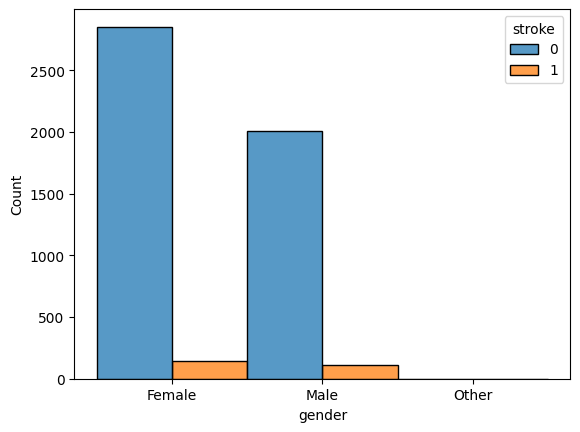

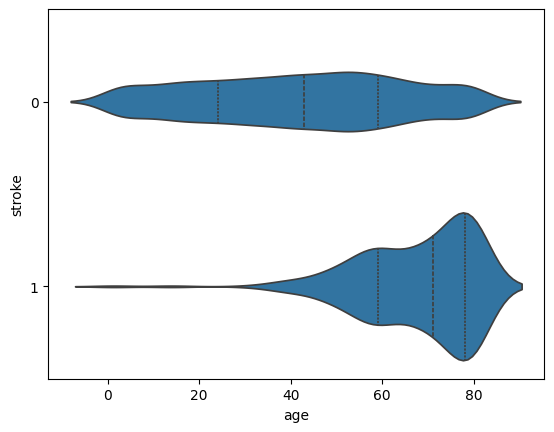

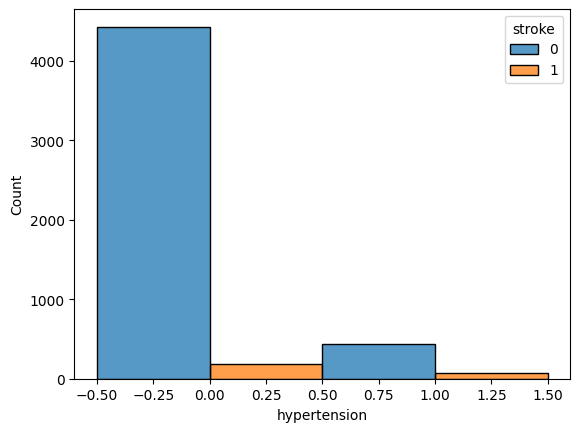

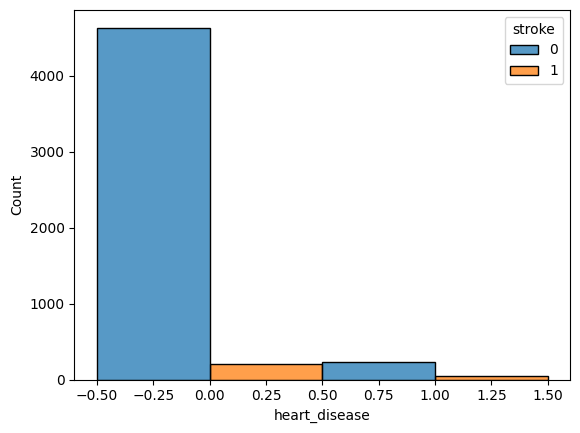

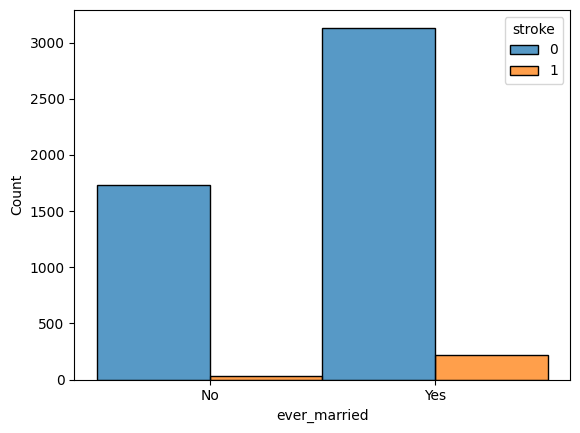

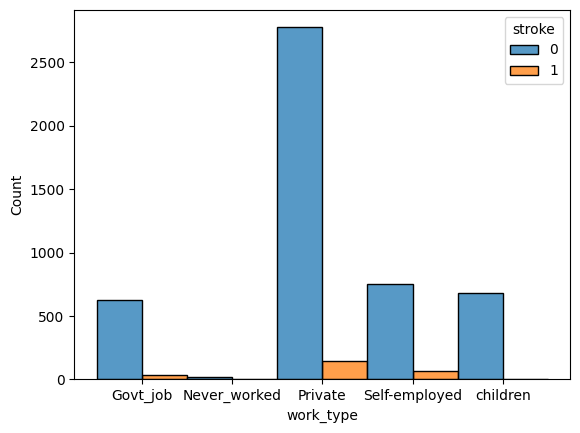

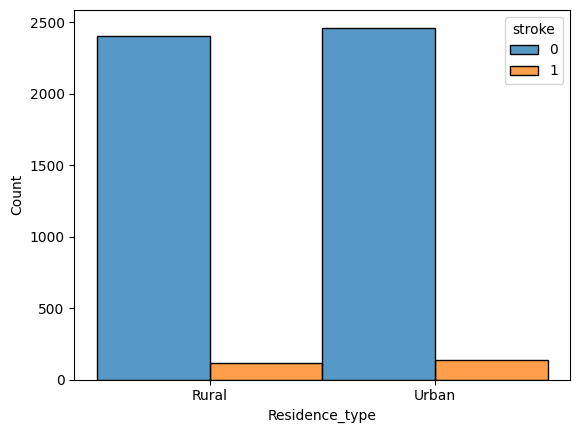

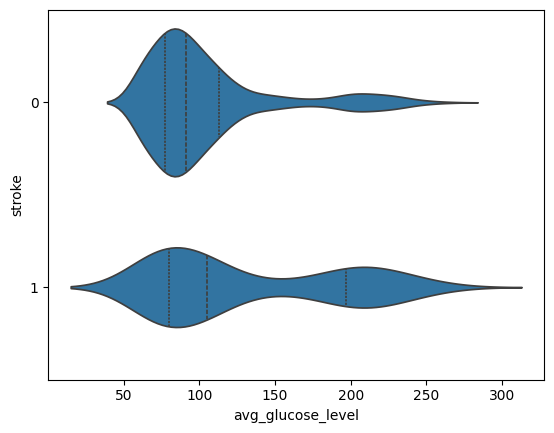

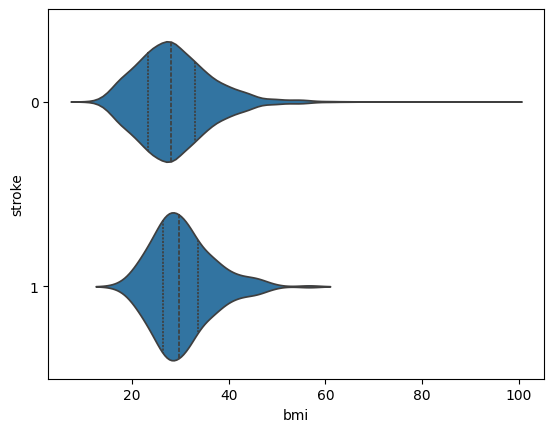

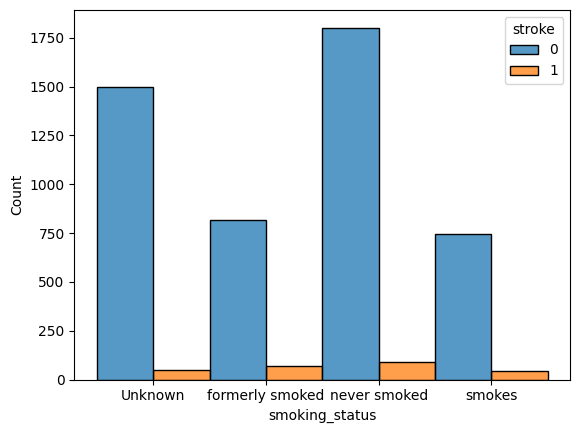

In [208]:
 #Age, avg_glucose_level and bmi are continuous variables v distributions = do violin plots:

#cont_df = cvd[["hypertension", "avg_glucose_level", 'bmi', "stroke", "gender"]]

for var in cvd:
  if var == 'id':
    pass
  elif var == 'stroke':
    pass
  elif cvd[var].dtype == 'category':
        fig, ax = plt.subplots()
        sns.histplot(data = cvd,
        x = var,
        hue = "stroke",
    # Draw side-by-side bars.
        multiple = "dodge",
    # Set the number of bins in the histogram.
        bins = 10,
        stat="count",
    # Set on which 'axis' (panel) we want to draw the plot.
        ax = ax)
  elif cvd[var].dtype == 'int64' or "float64":
    fig, ax = plt.subplots()
    sns.violinplot(
    data=cvd,
    x = var,
    y = "stroke",
    dodge = True,
    inner = "quartile",
    ax = ax
    )

In [159]:
#For sex, hypertension (yes/no), smoking status etc. do histograms

print(cvd[[var]!= "id"]

SyntaxError: incomplete input (ipython-input-4271826580.py, line 3)

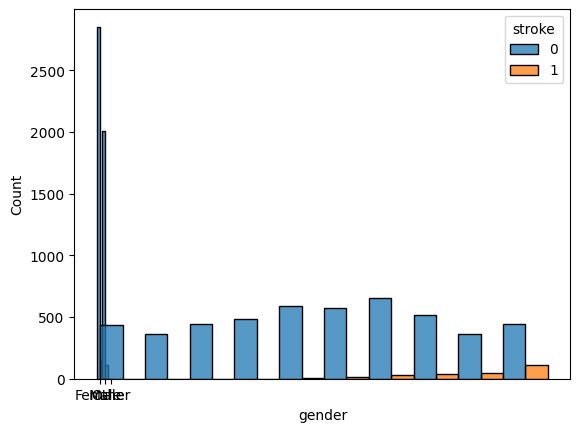

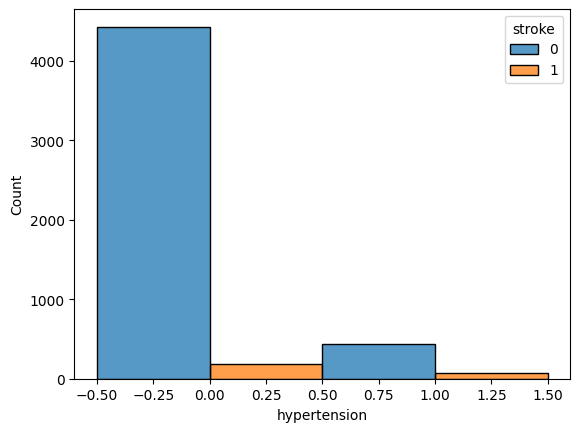

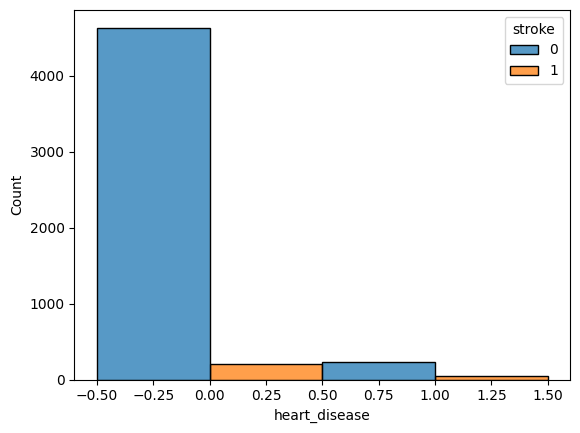

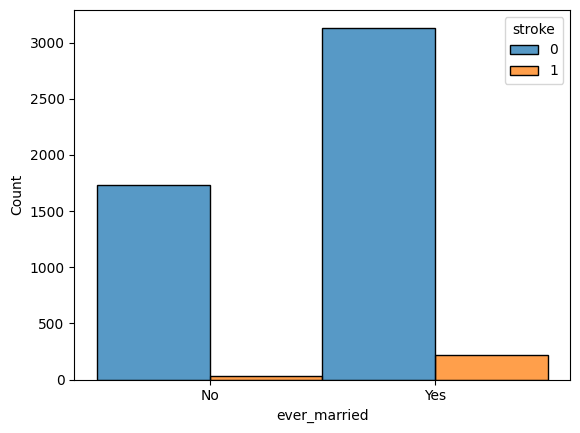

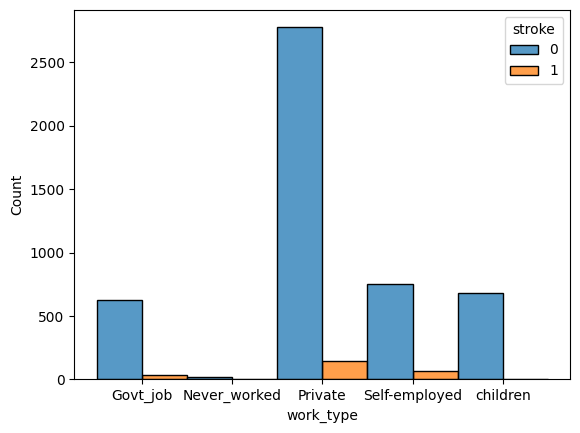

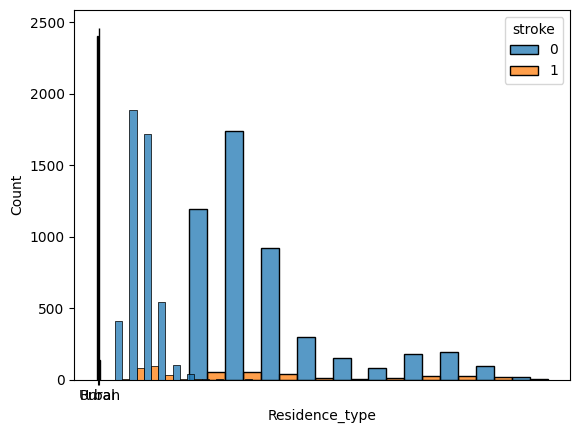

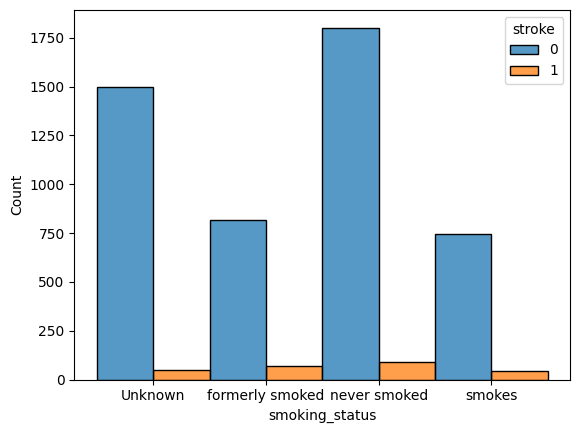

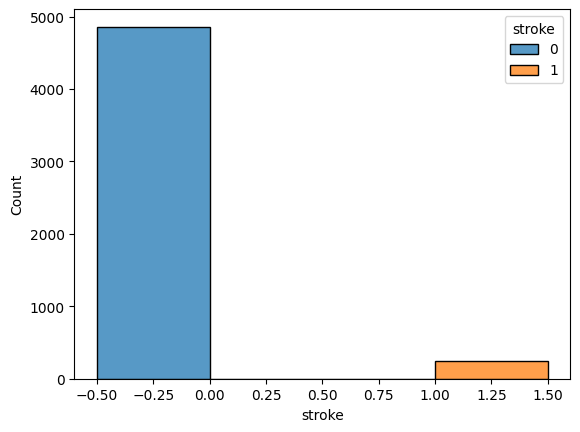

### 2.2 Correlation coefficients

Plot the correlation coefficients of all numerical features:

1. Use the method `corr()` on the dataframe. What is the result?

2. Now use a heatmap to show the correlation coeffcients graphically.

3. Try some different options to make your heatmap look nicer.

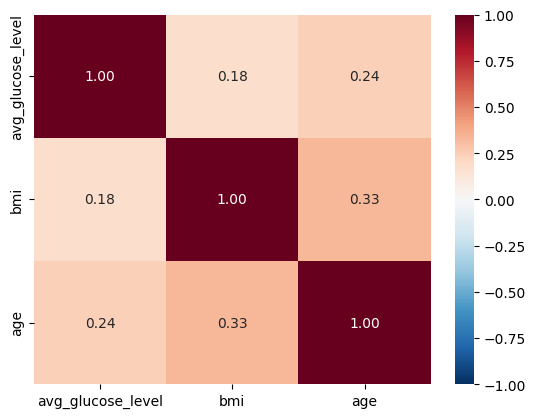

                   avg_glucose_level       bmi       age
avg_glucose_level           1.000000  0.175502  0.238171
bmi                         0.175502  1.000000  0.333398
age                         0.238171  0.333398  1.000000


In [164]:
cor = cvd[[ "avg_glucose_level", 'bmi', "age"]].corr()

fig, ax = plt.subplots()

# Use the 'seaborn.heatmap' function to draw the plot.
sns.heatmap(

    # Set the input data frame.
    data = cor,

    # Set whether to display the numerical value of each cell in the
    # cell itself.
    annot = True,

    # Set the format of the annotations (here, ".2f" means "a floating
    # point number with only 2 decimals after the point").
    fmt = ".2f",

    # Set the color map (palette) to use.
    cmap = "RdBu_r",

    # Set where the "center" of the color map is located.
    center = 0,

    # Set the minimum value represented by the color map.
    vmin = -1,

    # Set the maximum value represented by the color map.
    vmax = 1,
    ax = ax

)

# Call the 'matplotlib.pyplot.show' function to display our plot.
plt.show()

#close to no correlation between continuous variables, strongest correlation bmi and avg_glucose level

print(cor)



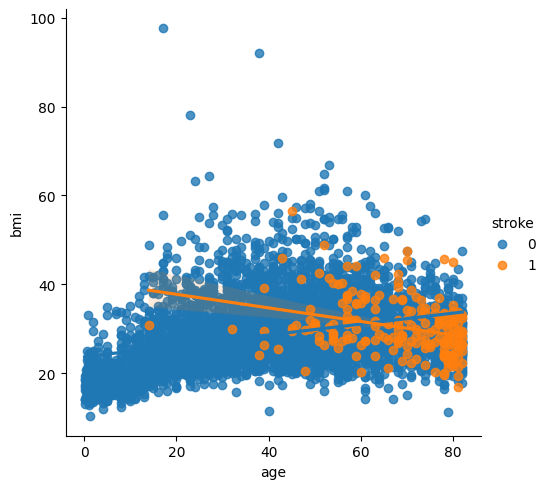

### 2.3 Scatter plot

Make a scatter plot of the two variables with the highest correlation. Divide the plots by the outcome variable and add marginal plots and a trendline:

1. Find the pair of variables that has the highest correlation with each other and make a scatter plot of them.

2. Divide the scatter plot into two by the outcome variable.

3. Add marginal distributions on one of the axis and a trendline.

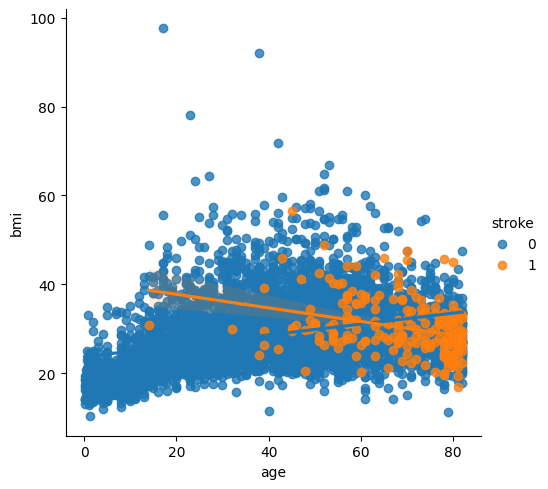

In [209]:
sns.lmplot(

    # Set the input data frame, x and y axis.
    data = cvd,
    x = "age",
    y = "bmi",
    hue = "stroke"
  )
scatter_kws={"s": 1, "alpha": 0.5}
#

# Set the title of the plot.
ax.set_title("Hypertension by age")

# Set the label for the x-axis.
ax.set_xlabel("Age")
ax.set_ylabel("BMI")

# Show the plot.
plt.show()

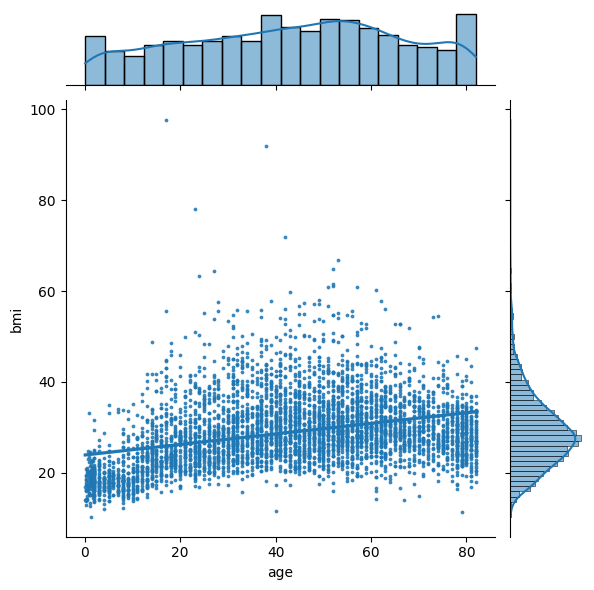

In [282]:
# Use the 'seaborn.jointplot' function.
sns.jointplot(
    data=cvd,
    x="age",
    y="bmi",
    kind="reg",
    scatter_kws= {"s": 3}
    )

# Call the 'matplotlib.pyplot.show' function to display our plot.
plt.show()

## 3. Data cleaning

Now, we switch the [cirrhosis dataset]('https://raw.githubusercontent.com/Center-for-Health-Data-Science/PythonTsunami/spring2022/Exercise/datasets/cirrhosis.csv').

We will investigate what data is missing and try to impute it.

A word of caution:

Note that imputation is a __complex subject__ and whether it makes sense to do it and the method used highly depend on the data set. Sometimes, the mean of a value across all non-missing observations is a good approximation for the missing value. On the other hand, if you have a column that says whether or not the person was treated with the drug or the placebo we have no good way to guess which treatment the person received. Replacing missing values in this column with the most common value (which is that they did get the drug) will produce extremely __wrong data__ and lead you to __wrong conclusions__. Do not do that!


### 3.0 Load the data

Load in the cirrhosis dataset using one of the two methods you used earlier for the stroke data. Change as well the outcome variable to a type "category".

In [212]:

liver = pd.read_csv('https://raw.githubusercontent.com/Center-for-Health-Data-Science/PythonTsunami/refs/heads/2024_Oct/Exercise/datasets/cirrhosis.csv')

liver.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### 3.1 Missing data

1. Use the pandas method `isnull`.

2. Get the number of missing values per column by calling `sum()` on the result of `isnull`. Which features, i.e. columns have missing values?

3. Make a barplot that shows the number of missing values per column.


<Axes: xlabel='Count', ylabel='Var'>

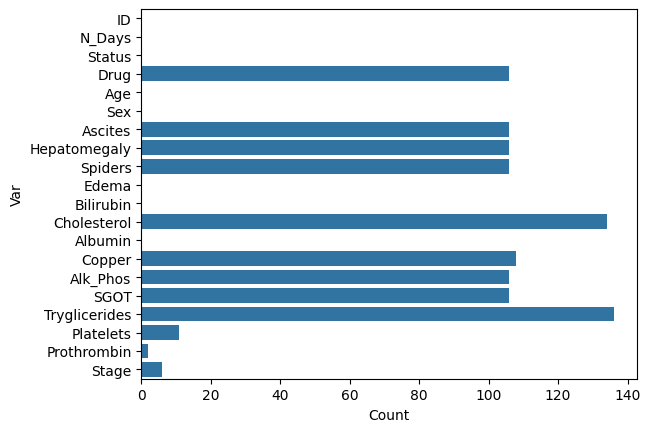

In [317]:
nulls = liver.isnull().sum()
nulls = nulls.reset_index()
nulls = pd.DataFrame(nulls)
nulls = nulls.rename(columns={"index":"Var", 0:"Count"})

fig, ax = plt.subplots() #create panel to plot on

# Create the bar plot using the 'seaborn.barplot' function.
sns.barplot(
    data = nulls,
    x = "Count",
    y = "Var",
    ax = ax
)


### 3.2 Omitting observations with missing values

1. Create a subset in which you omit all patients, i.e. rows, which have missing values in any column. Take care to not overwrite the original dataframe. If you did, you can re-import it.

2. How many observations, i.e. patients, would you be left with if you removed all missing values?

3. How many if you only omit patients where the outcome is missing?


In [331]:
df = liver.dropna()

df["ID"].count()

df = liver.loc[liver["Stage"].dropna()]

df["ID"].count()


np.int64(412)

### 3.3 Effects of removing data

We can now have a look at how removing nans effects the data.


1. First, plot the correlation coefficient between all numerical columns in the original cirrhosis dataframe. (Analogous to 2.2).

2. Now, remake the plot for the subset where you have removed all rows with any missing data. Have the correlations changed?

### 3.4 Imputation

Use the method `fillna()` to impute missing values in the columns **where it makes sense**. Have a look at the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

1. A good way to impute numerical data can be i.e. the mean or median. Calculate the mean for all numerical columns.

2. Perform the imputation.

3. Re-make the barplot from 3.1. to check that it worked.

4. Recalculate correlation coefficients between all numerical columns and show it in a heatmap.
